In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('/kaggle/input/who-is-the-real-winner/train.csv')
data_test = pd.read_csv('/kaggle/input/who-is-the-real-winner/test.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
#Converting the string type 'Total Assets' column to numerical type
Numerical_Assets = []
def convert_to_thousands(value):
    if 'Crore+' in value:
        value = value.split()[0]
        Numerical_Assets.append(float(value)*10000)
    elif 'Lac+' in value:
        value = value.split()[0]
        Numerical_Assets.append(float(value)*100)
    elif 'Thou+' in value:
        value = value.split()[0]
        Numerical_Assets.append(float(value))
    elif value == '0':
        Numerical_Assets.append(0)

for value in data['Total Assets']:
    if not pd.isna(value):
        convert_to_thousands(value)

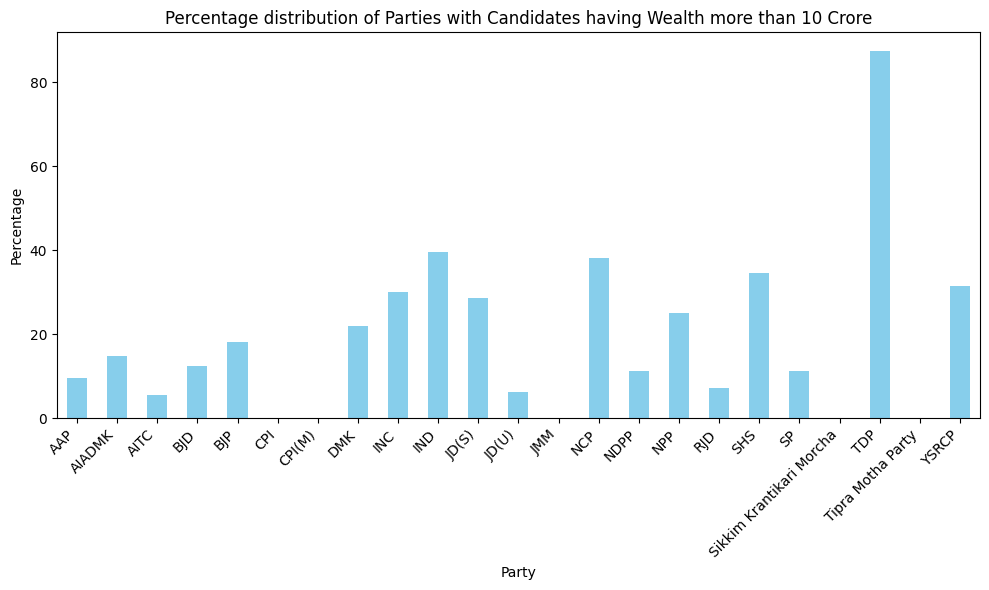

In [ ]:
#Setting the threshold for plotting
label = 100000

# 10 Crore
data['Numerical_Assets'] = Numerical_Assets
above_threshold = data[data['Numerical_Assets'] > label]
wealth_percentage = above_threshold['Party'].value_counts() / data['Party'].value_counts()*100

#Setting up the plot
plt.figure(figsize=(10, 6))
wealth_percentage.plot(kind='bar', color='skyblue')
plt.title(f'Percentage distribution of Parties with Candidates having Wealth more than 10 Crore')
plt.xlabel('Party')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#Show plot
plt.show()

In [ ]:
data = data.drop('Numerical_Assets', axis=1)

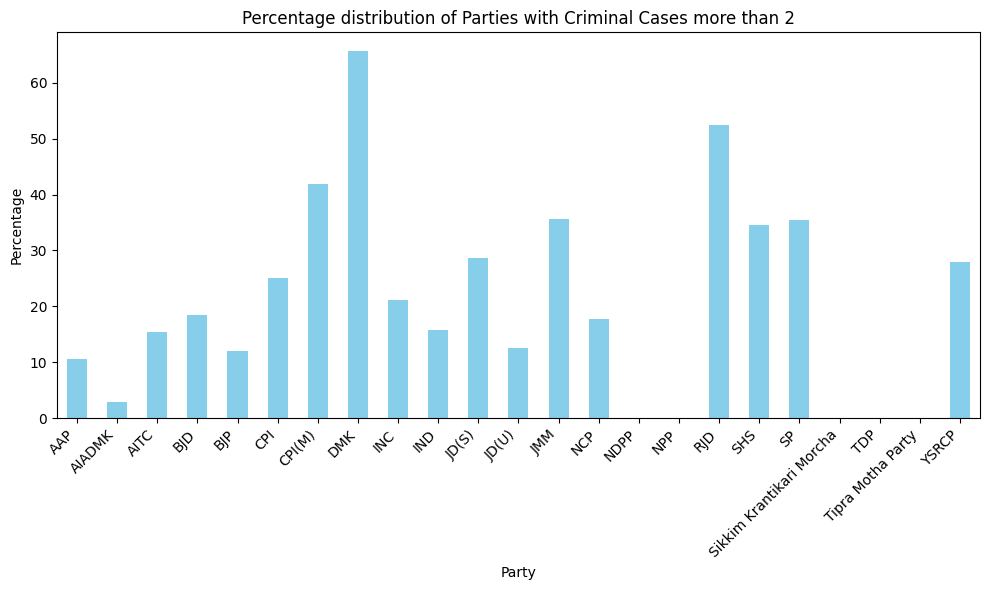

In [ ]:
#Setting the threshold for plotting
label = 2

#Threshold is more than 2 criminal cases
above_threshold = data[data['Criminal Case'] > label]
Criminal_Case_percentage = above_threshold['Party'].value_counts() / data['Party'].value_counts() * 100

#Setting up the plot
plt.figure(figsize=(10, 6))
Criminal_Case_percentage.plot(kind='bar', color='skyblue')
plt.title(f'Percentage distribution of Parties with Criminal Cases more than {label}')
plt.xlabel('Party')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#Show plot
plt.show()


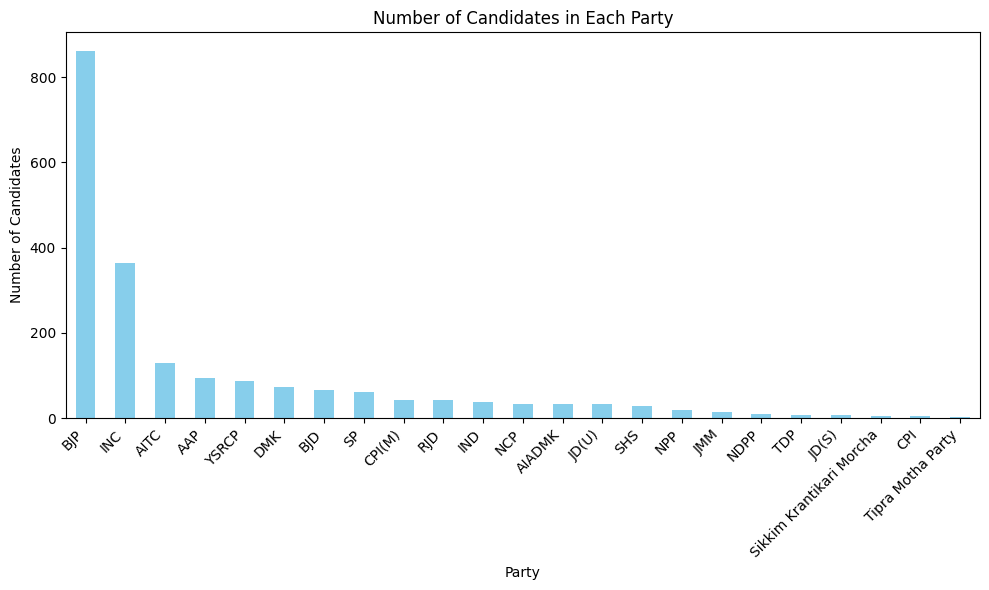

In [ ]:
# Plot the number of candidates in each party
plt.figure(figsize=(10, 6))
data['Party'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Candidates in Each Party')
plt.xlabel('Party')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#Data Preprocessing
y = data['Education']
X = data.drop(['Education', 'ID', 'Candidate', 'Constituency ∇'], axis = 1)
X_test = data_test.drop(['ID', 'Candidate', 'Constituency ∇'], axis = 1)

#Encoding
def encode_categorical_column(data, data_test, column):

    unique_values = data[column].unique()

    label_encoder = LabelEncoder()
    encoded_values = label_encoder.fit_transform(unique_values)
    encoding_dict = dict(zip(unique_values, encoded_values))

    data[column] = data[column].map(encoding_dict)
    data_test[column] = data_test[column].map(encoding_dict)
    data_test[column].fillna(-1, inplace=True)
    data_test = data_test[data_test[column] != -1]


for column in X.columns:
    if X[column].dtype == 'object' and column != 'Education' and column != 'Criminal Case':
        encode_categorical_column(X, X_test, column)

/tmp/ipykernel_33/4088476176.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test[column].fillna(-1, inplace=True)
/tmp/ipykernel_33/4088476176.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [ ]:
#Training the model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X, y)

RandomForestClassifier(random_state=42)

In [ ]:
#Testing the model on the test dataset
y_pred_test = random_forest.predict(X_test)

#Generating the predictions.csv file
predictions_df = pd.DataFrame({'ID': range(len(y_pred_test)), 'Education': y_pred_test})
predictions_df.to_csv('predictions.csv', index=False)